<a href="https://colab.research.google.com/github/abraham220703/pSD/blob/main/Python_008_Butterworth_Filter_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
 # libraries
 import cv2
 import numpy as np
 import matplotlib.pyplot as plt

 # open the image
f = cv2.imread('/content/grysc.jpeg',0)

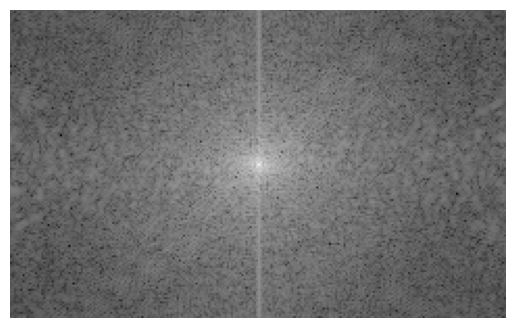

In [11]:
# transform image into freq. domain and shifted
f = np.fft.fft2(f)
fshift = np.fft.fftshift(f)

plt.imshow(np.log1p(np.abs(fshift)), cmap='gray')
plt.axis('off')
plt.show()

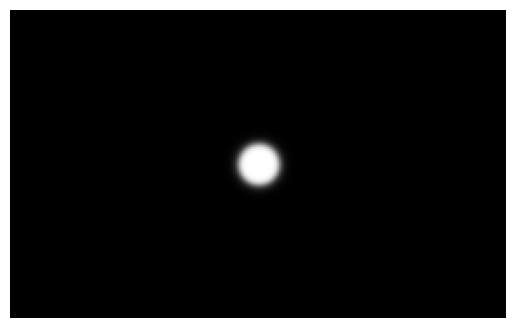

In [14]:
# butterwort Low Pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 #cut of frequency
n = 10 #prder
for u in range(M):
  for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      H[u,v] = 1/(1+ (D/D0)**n)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()


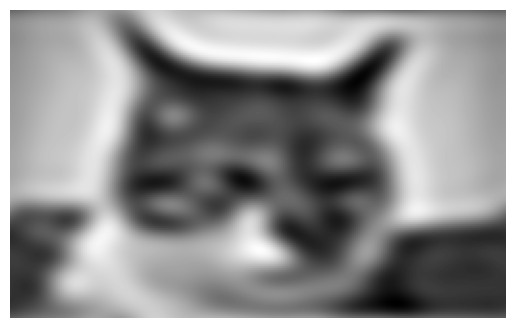

In [16]:
# frequancy domain image filters
Gshift = fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

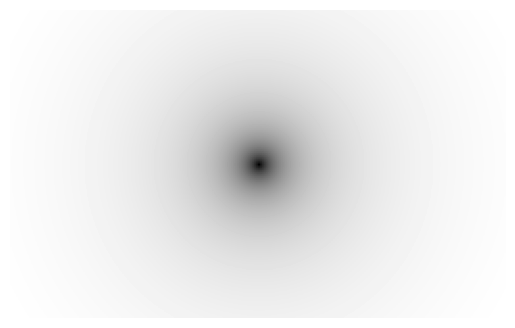

In [17]:
# Buttrerworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    HPF[u,v] = 1-1/(1+(D/D0)**n)

plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

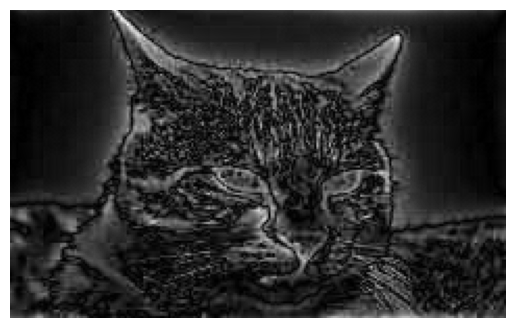

In [19]:
#frequency_domain_image_filters =
Gshift = fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()